# Homework 04
## Özlem Ölçer ID: 69217

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

def safelog2(x):
    if x == 0:
        return(0)
    else:
        return(np.log2(x))

Importing Data

In [2]:
data = np.genfromtxt("hw04_data_set.csv", delimiter = ",")
D = data.shape[1] - 1
N = data.shape[0]
train_data = data[1:151,:] 
test_data = data[151:,:]

X = data[:, 0:D]
y = data[:, D:(D + 1)].astype(int)

# get number of classes
K = np.max(y[:, 0])

X_train = train_data[:,0]
y_train = train_data[:,1]

X_test = test_data[:,0]
y_test = test_data[:,1]



N_train = len(y_train)
N_test = len(y_test)



Initialization & Decision tree regression algorithm

In [3]:
def learn_dt(P):
    # create necessary data structures
    node_indices = {}
    is_terminal = {}
    need_split = {}

    node_features = {}
    node_splits = {}
    node_frequencies = {}

    # put all training instances into the root node
    node_indices[1] = np.array(range(N_train))
    is_terminal[1] = False
    need_split[1] = True

    
    # learning algorithm
    while True:
        # find nodes that need splitting
        split_nodes = [key for key, value in need_split.items() if value == True]
        
        # check whether we reach all terminal nodes
        if len(split_nodes) == 0:
            break
            
        # find best split positions for all nodes
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
            
            if len(data_indices) <= P:
                is_terminal[split_node] = True
                node_frequencies[split_node] = np.mean(y_train[data_indices])
            else:
                is_terminal[split_node] = False
                unique_values = np.sort(np.unique(X_train[data_indices]))
                split_positions = (unique_values[1:] + unique_values[:-1]) / 2
                split_scores = np.repeat(0.0, len(split_positions))
                
                for s in range(len(split_positions)):
                    left_indices = data_indices[X_train[data_indices] > split_positions[s]]
                    right_indices = data_indices[X_train[data_indices] <= split_positions[s]]

                    split_scores[s] = (np.sum(((y_train[i] - np.mean(y_train[left_indices])) ** 2) for i in left_indices) +
                        np.sum(((y_train[j] - np.mean(y_train[right_indices])) ** 2) for j in right_indices))/len(data_indices)
                   
                node_splits[split_node] = split_positions[np.argmin(split_scores)]
            
                
                # Left Branch
                left_indices = data_indices[X_train[data_indices] > node_splits[split_node]]
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True

                    # Right Branch
                right_indices = data_indices[X_train[data_indices] <= node_splits[split_node]]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
                
    return is_terminal, node_splits, node_frequencies

In [4]:
def prediction(point, is_terminal, node_splits, node_frequencies):
    iter = 1
    while(not is_terminal[iter]):
        if point > node_splits[iter]:
            iter = 2 * iter
        else:
            iter = 2 * iter + 1
    return node_frequencies[iter]

C:\Users\ozlemolcer\AppData\Local\Temp\ipykernel_5332\3505434496.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  split_scores[s] = (np.sum(((y_train[i] - np.mean(y_train[left_indices])) ** 2) for i in left_indices) +
C:\Users\ozlemolcer\AppData\Local\Temp\ipykernel_5332\3505434496.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(((y_train[j] - np.mean(y_train[right_indices])) ** 2) for j in right_indices))/len(data_indices)


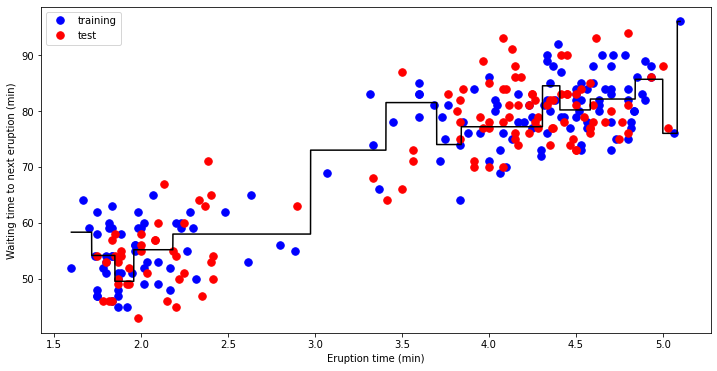

In [5]:
# Learn Decision Tree (Pre-Pruning Parameter = 25)
is_terminal, node_splits, node_frequencies = learn_dt(25)
# Plot Figures
data_points = np.linspace(np.min(X_train), np.max(X_train), 10000)

y_pred = [prediction(d, is_terminal, node_splits, node_frequencies) for d in data_points]



## Test Plot
plt.figure(figsize=(12, 6))
plt.plot(X_train, y_train, "b.", markersize=15, label='training')
plt.plot(X_test, y_test, "r.", markersize=15, label='test')
plt.plot(data_points, y_pred, "k")
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.legend(loc='upper left')
plt.show()

RMSE Values

In [6]:
RMSE_train = np.sqrt(np.mean((y_train -[prediction(x, is_terminal, node_splits, node_frequencies) for x in X_train]) ** 2))
RMSE_test = np.sqrt(np.mean((y_test -[prediction(x, is_terminal, node_splits, node_frequencies) for x in X_test]) ** 2))

print("RMSE on training set is", RMSE_train, "when P is 25")
print("RMSE on test set is", RMSE_test, "when P is 25")

RMSE on training set is 4.541214189194451 when P is 25
RMSE on test set is 6.454083413352087 when P is 25


In [7]:
prep_set = np.arange(5,55,5)
rmse_train_set = np.zeros(len(prep_set))
rmse_test_set = np.zeros(len(prep_set))

for p in range(len(prep_set)):
    is_terminal, node_splits, node_frequencies = learn_dt(prep_set[p])
    y_pred_train = [prediction(x, is_terminal, node_splits, node_frequencies) for x in X_train]
    y_pred_test = [prediction(x, is_terminal, node_splits, node_frequencies) for x in X_test]
    rmse_train_set[p] = np.sqrt(np.mean((y_train - y_pred_train) ** 2))
    rmse_test_set[p] = np.sqrt(np.mean((y_test - y_pred_test) ** 2))

C:\Users\ozlemolcer\AppData\Local\Temp\ipykernel_5332\3505434496.py:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  split_scores[s] = (np.sum(((y_train[i] - np.mean(y_train[left_indices])) ** 2) for i in left_indices) +
C:\Users\ozlemolcer\AppData\Local\Temp\ipykernel_5332\3505434496.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(((y_train[j] - np.mean(y_train[right_indices])) ** 2) for j in right_indices))/len(data_indices)


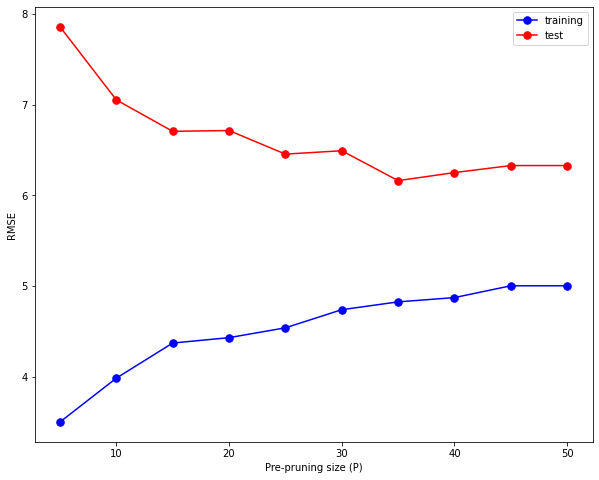

In [8]:
## Plot Training and Test RMSEs together
plt.figure(figsize=(10, 8))
plt.plot(prep_set, rmse_train_set, "b.-", markersize=15, label='training')
plt.plot(prep_set, rmse_test_set, "r.-", markersize=15, label='test')
plt.xlabel("Pre-pruning size (P)")
plt.ylabel("RMSE")
plt.legend(loc='upper right')
plt.show()